# 0. Download Data

In [4]:
import requests

url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv"
response = requests.get(url)

with open("laptops.csv", "wb") as file:
    file.write(response.content)


# 1. Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# import dataset to df
df = pd.read_csv("laptops.csv")

In [3]:
# df first 5 rows
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


### Preparing the dataset

In [4]:
# Normalize the column names as instructed
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Select only the relevant columns: 'ram', 'storage', 'screen', 'final_price'
df_filtered = df[['ram', 'storage', 'screen', 'final_price']]

In [5]:
df_filtered

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


- Now, instead of 'Final Price', we have 'final_price'

- Next following columns: `'ram', 'storage', 'screen', 'final_price'`

In [6]:
df_filtered.dtypes

ram              int64
storage          int64
screen         float64
final_price    float64
dtype: object

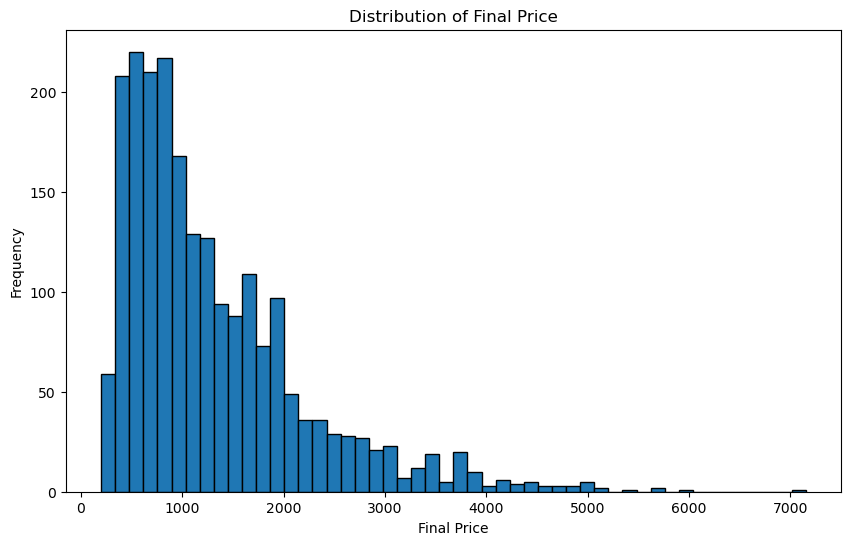

In [7]:
import matplotlib.pyplot as plt

# Extract the 'final_price' column
final_price = df_filtered['final_price']

# Plot the distribution of the 'final_price' variable
plt.figure(figsize=(10, 6))
plt.hist(final_price.dropna(), bins=50, edgecolor='k')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.title('Distribution of Final Price')
plt.show()

### Question 1: There's one column with missing values. What is it?


There's one column with missing values. What is it?

- [ ] 'ram'
- [ ] 'storage'
- [x] 'screen'
- [ ] 'final_price'

In [8]:
# Check for missing values to identify the column with missing data
missing_values = df_filtered.isnull().sum()

# Display the missing values count
missing_values

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### Question 2: What's the median (50% percentile) for variable 'ram'?

- [ ] 8
- [x] 16
- [ ] 24
- [ ] 32

In [9]:
# Extract the 'ram' column and calculate the median
ram_median = df_filtered['ram'].median()

# Print the median value
print("Median (50% percentile) for variable 'ram':", ram_median)

Median (50% percentile) for variable 'ram': 16.0


# 2. Data Splitting

Prepare and split the dataset

- Shuffle the dataset (the filtered one you created above), use seed 42.
- Split your data in train/val/test sets, with 
 distribution.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [10]:
# Convert all columns to numeric, forcing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Identify columns with missing values
missing_column = 'screen'

# Shuffle the DataFrame with a random seed of 42
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Calculate the number of samples for each set
train_size = int(0.6 * len(df_shuffled))
val_size = int(0.2 * len(df_shuffled))
test_size = len(df_shuffled) - train_size - val_size

# Split the DataFrame into train, validation, and test sets
X_train = df_shuffled[:train_size]
X_val = df_shuffled[train_size:train_size + val_size]
X_test = df_shuffled[train_size + val_size:]

# Extract the target variable and apply log transformation
Y_train = np.log1p(X_train['final_price']).values
Y_val = np.log1p(X_val['final_price']).values
Y_test = np.log1p(X_test['final_price']).values

# Remove the target variable from the feature sets
X_train = X_train.drop(columns=['final_price'])
X_val = X_val.drop(columns=['final_price'])
X_test = X_test.drop(columns=['final_price'])

# 3. Linear Regression



Consider a hypothetical dataset with multiple features $X_{1},\cdots, X_{d}$ and a target variable $Y$ as shown:

$$
\left( \begin{array}{c|cccc|c}
~    &X_{0}&X_{1}&\cdots & X_{d}  & Y\\
\hline
x_{1} &1& x_{11}& \cdots&x_{1d}&y_1 \\
\vdots&\vdots&\vdots&\ddots&\vdots&\vdots\\
x_{n}&1&x_{n1}&\cdots&x_{nd}&y_n
\end{array} \right).$$

Here, each row vector $ \mathbf{x}_i = (1, x_{i1}, \ldots, x_{id}) $ represents an instance of the dataset with $ d+1 $ values. The first column, $ X_0 $, is the intercept term and is set to 1 for all instances. The dataset is separated in a feature matrix $\mathbf{X}$ and a target vector $\mathbf{Y}$:


$$\mathbf{X}=
\left( \begin{array}{cccc}
 1& x_{11}& \cdots&x_{1d} \\
\vdots&\vdots&\ddots&\vdots&\\
1&x_{n1}&\cdots&x_{nd}
\end{array} \right) ~~~ \text{and} ~~~ 

\mathbf{Y} = \left( \begin{array}{c}
y_1\\
\vdots\\
y_n
\end{array} \right)
$$




The linear regression model for multiple features $ X_1, \ldots, X_d $ can be represented as:


$$\mathbf{\hat{Y}} = \mathbf{X}\mathbf{w} $$

Here, $\mathbf{w} = (w_0, \ldots, w_d)^T$ denotes the column vector of weights that the model seeks to learn for optimal regression. $\mathbf{\hat{Y}}$ represents the predicted values, and $\mathbf{Y}$ stands for the true values (or target values). The error function commonly used is the sum of squared errors (SSE):

$$\text{SSE} = \sum_{i}^{n} ||{\epsilon}_i||^2 = \mathbf{\epsilon}\mathbf{\epsilon}^T$$

where $\mathbf{\epsilon} = \mathbf{\hat{Y}} - \mathbf{Y}$.

Rearranging the error function gives:

$$
\begin{align*}
\text{SSE} &= (\mathbf{\hat{Y}} - \mathbf{Y})^T(\mathbf{\hat{Y}} - \mathbf{Y})\\
&=\mathbf{Y}^T \mathbf{Y}  - 2\mathbf{Y}^T \mathbf{\hat{Y}} + \mathbf{\hat{Y}}^T \mathbf{\hat{Y}}\\
&=\mathbf{Y}^T \mathbf{Y}  - 2\mathbf{Y}^T  (\mathbf{X}\mathbf{w}) + ( \mathbf{X}\mathbf{w})^T ( \mathbf{X}\mathbf{w})\\
&=\mathbf{Y}^T \mathbf{Y}  - 2 \mathbf{w}^T (\mathbf{X}^T\mathbf{Y}) + \mathbf{w}^T( \mathbf{X}^T\mathbf{X}) \mathbf{w}
\end{align*}
$$

The goal is to minimize this error to optimize the ideal weights. Instead of using gradient descent, we take the derivative of the SSE with respect to the weights, set it equal to zero, and find a local minimum of the SSE function. This leads to the following optimal weights for the optimization problem:

$$
\begin{align*}
\frac{\partial (\text{SSE})}{\partial \mathbf{w}} & = -2\mathbf{X}^T\mathbf{Y} + (\mathbf{X}^T\mathbf{X})\mathbf{w} + \mathbf{w}^T(\mathbf{X}^T\mathbf{X})\\
& = -2\mathbf{X}^T\mathbf{Y} + 2(\mathbf{X}^T\mathbf{X})\mathbf{w} = 0
\end{align*}
$$

Solving for the optimal weights, we get the following analytical solution:

$$\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}$$

In summary, for a given dataset with multiple features, we can represent the linear regression model as a product of weights and input features. The objective is to minimize the sum of squared errors (SSE) to find the optimal weights for the model. By taking the derivative of the SSE with respect to the weights and setting it to zero, we can determine the optimal weights for the optimization problem using the above equation.

### Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)

#### Which option gives better RMSE?

Options:

- [x] With 0
- [ ] With mean
- [ ] Both are equally good

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
laptops_df = pd.read_csv('laptops.csv')

# Normalize column names
laptops_df.columns = laptops_df.columns.str.lower().str.replace(' ', '_')

# Select relevant columns
laptops_df = laptops_df[['ram', 'storage', 'screen', 'final_price']]

# Split the dataset
train_val, test = train_test_split(laptops_df, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Option 1: Fill missing values with 0
train_0 = train.fillna(0)
val_0 = val.fillna(0)

# Train the model
model_0 = LinearRegression()
model_0.fit(train_0.drop('final_price', axis=1), train_0['final_price'])

# Predict and calculate RMSE
predictions_0 = model_0.predict(val_0.drop('final_price', axis=1))
rmse_0 = np.sqrt(mean_squared_error(val_0['final_price'], predictions_0))

# Option 2: Fill missing values with mean
mean_values = train.mean()
train_mean = train.fillna(mean_values)
val_mean = val.fillna(mean_values)

# Train the model
model_mean = LinearRegression()
model_mean.fit(train_mean.drop('final_price', axis=1), train_mean['final_price'])

# Predict and calculate RMSE
predictions_mean = model_mean.predict(val_mean.drop('final_price', axis=1))
rmse_mean = np.sqrt(mean_squared_error(val_mean['final_price'], predictions_mean))

# Round RMSE scores
rmse_0_rounded = round(rmse_0, 2)
rmse_mean_rounded = round(rmse_mean, 2)

rmse_0_rounded, rmse_mean_rounded

(581.35, 579.98)

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Shuffle the dataset using seed 42
df_filtered = df_filtered.sample(frac=1, random_state=42).reset_index(drop=True)

# Split data into train (60%), validation (20%), and test (20%) sets
df_train, df_temp = train_test_split(df_filtered, test_size=0.4, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

# Prepare features and target variable for the train and validation sets
X_train = df_train[['ram', 'storage', 'screen']]
y_train = df_train['final_price']
X_val = df_val[['ram', 'storage', 'screen']]
y_val = df_val['final_price']

# Two approaches for handling missing values in the 'screen' column
# 1. Fill missing values with 0
X_train_0 = X_train.fillna(0)
X_val_0 = X_val.fillna(0)

# 2. Fill missing values with the mean (only calculated on training set)
mean_screen = X_train['screen'].mean()
X_train_mean = X_train.fillna(mean_screen)
X_val_mean = X_val.fillna(mean_screen)

# Train two linear regression models (without regularization)
lr_0 = LinearRegression()
lr_0.fit(X_train_0, y_train)

lr_mean = LinearRegression()
lr_mean.fit(X_train_mean, y_train)

# Predict on the validation set
y_pred_0 = lr_0.predict(X_val_0)
y_pred_mean = lr_mean.predict(X_val_mean)

# Compute RMSE for both models
rmse_0 = np.sqrt(mean_squared_error(y_val, y_pred_0))
rmse_mean = np.sqrt(mean_squared_error(y_val, y_pred_mean))

rmse_0, rmse_mean


(675.0844456600815, 675.1574065408341)

The RMSE (Root Mean Squared Error) for the two models are:

- Filling missing values with 0: 675.08
- Filling missing values with the mean: 675.16

The option of filling missing values with 0 gives a slightly better RMSE.

# **4. Ridge Regression ($L_2$)**

If two or more columns of a matrix are not orthogonal to each other (i.e., they are correlated), it implies that the matrix is not invertible (singular matrix). Consequently, the optimal weights equation:

$$\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}$$

becomes problematic, as the inverse matrix $(\mathbf{X}^T\mathbf{X})$ is either hard to compute accurately or non-existent. This can result in large or unstable estimates of the regression coefficients, which can lead to poor model performance.

Regularization aims to ensure the existence of the inverse by forcing the matrix to be invertible, controlling the weights of the model so that they behave correctly and do not become too large.

Instead of simple minimizing the squared residual error $||\mathbf{Y} - \mathbf{\hat{Y}}||^2$, we add a regularization term involving the squared norm of the weights vector $|| \mathbf{w} ||^2$:

$$L(\mathbf{w}) = ||\mathbf{Y} - \mathbf{\hat{Y}}||^2 + \alpha || \mathbf{w} ||^2$$

The goal is to minimize $L(\mathbf{w})$. To achieve this, we take the derivative of $L(\mathbf{w})$ with respect to the weights, set it equal to zero, and find a local minimum of the function. This results in the following optimal weights:

$$\frac{dL(\mathbf{w})}{d\mathbf{w}} = -2\mathbf{X}^T\mathbf{Y} + 2(\mathbf{X}^T\mathbf{X})\mathbf{w} +2 \alpha \mathbf{w}= 0$$

therefore, the optimal solution is

$$\mathbf{w} = (\mathbf{X}^T\mathbf{X}+ \alpha \mathbf{I})^{-1}\mathbf{X}^T\mathbf{Y}$$

where $\mathbf{I}$ is the identity matrix. The matrix $(\mathbf{X}^T\mathbf{X}+ \alpha \mathbf{I})$ is always invertible for $\alpha > 0$. 

The reason behind this is that $\mathbf{X}^T\mathbf{X}$ is always symmetric and positive semi-definite, meaning all its eigenvalues are non-negative. However, this does not guarantee invertibility, as eigenvalues can still be zero, resulting in a singular matrix.

When adding the two matrices, $(\mathbf{X}^T\mathbf{X} + \alpha \mathbf{I})$, the resulting matrix's eigenvalues are the sums of the corresponding eigenvalues of the original matrices. Since the eigenvalues of $\mathbf{X}^T\mathbf{X}$ are non-negative and those of $\alpha \mathbf{I}$ are positive, the eigenvalues of $(\mathbf{X}^T\mathbf{X} + \alpha \mathbf{I})$ are strictly positive. A symmetric matrix with strictly positive eigenvalues is positive definite, which are always invertible as none of their eigenvalues are equal to zero. Consequently, the matrix $(\mathbf{X}^T\mathbf{X} + \alpha \mathbf{I})$ is always invertible for $\alpha > 0$.

### Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

- [ ] 0
- [ ] 0.01
- [ ] 1
- [ ] 10
- [x] 100

In [13]:
from sklearn.linear_model import Ridge

# Different regularization strengths to test
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]

# List to store the RMSE values for each r
rmse_r_values = []

# Loop through each regularization value and train a model
for r in r_values:
    # Train a Ridge regression model (L2 regularization)
    ridge_model = Ridge(alpha=r)
    ridge_model.fit(X_train_0, y_train)

    # Predict on the validation set
    y_pred_ridge = ridge_model.predict(X_val_0)

    # Compute RMSE for the model
    rmse_r = np.sqrt(mean_squared_error(y_val, y_pred_ridge))
    rmse_r_values.append((r, rmse_r))

# Convert results to a DataFrame for easy visualization
rmse_r_df = pd.DataFrame(rmse_r_values, columns=['r', 'rmse'])

rmse_r_rounded = round(rmse_r_df, 2)

rmse_r_rounded

,r,rmse
0,0.00,675.08
1,0.01,675.08
2,0.10,675.08
3,1.00,675.08
4,5.00,675.08
5,10.00,675.08
6,100.00,675.01


The regularization value r=100 gives the best RMSE among the tested values

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- [ ] 19.176
- [x] 29.176
- [ ] 39.176
- [ ] 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [14]:
# List of seed values to test
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# List to store RMSE values for each seed
rmse_seeds = []

# Loop through each seed, split the data, and compute RMSE
for seed in seeds:
    # Split data into train (60%), validation (20%), and test (20%) sets with different seed values
    df_train, df_temp = train_test_split(df_filtered, test_size=0.4, random_state=seed)
    df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=seed)

    # Prepare features and target variable for the train and validation sets
    X_train = df_train[['ram', 'storage', 'screen']].fillna(0)
    y_train = df_train['final_price']
    X_val = df_val[['ram', 'storage', 'screen']].fillna(0)
    y_val = df_val['final_price']

    # Train a linear regression model
    lr_seed = LinearRegression()
    lr_seed.fit(X_train, y_train)

    # Predict on the validation set
    y_pred_seed = lr_seed.predict(X_val)

    # Compute RMSE for the model
    rmse_seed = np.sqrt(mean_squared_error(y_val, y_pred_seed))
    rmse_seeds.append(rmse_seed)

# Calculate the standard deviation of the RMSE values
rmse_std = np.std(rmse_seeds)

rmse_std


29.442043689360084

The standard deviation of the RMSE scores across different seed values is approximately 29.442.

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- [ ] 598.60
- [ ] 608.60
- [ ] 618.60
- [ ] 628.60

In [15]:
# Split the dataset using seed 9
df_train, df_temp = train_test_split(df_filtered, test_size=0.4, random_state=9)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=9)

# Combine train and validation datasets
df_combined = pd.concat([df_train, df_val])

# Prepare features and target variable for the combined train and test sets
X_combined = df_combined[['ram', 'storage', 'screen']].fillna(0)
y_combined = df_combined['final_price']
X_test = df_test[['ram', 'storage', 'screen']].fillna(0)
y_test = df_test['final_price']

# Train a Ridge regression model with r=0.001
ridge_model_final = Ridge(alpha=0.001)
ridge_model_final.fit(X_combined, y_combined)

# Predict on the test set
y_pred_test = ridge_model_final.predict(X_test)

# Compute RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

rmse_test

537.1479527897068

The RMSE on the test dataset when using seed 9 and a regularization value  `r=0.001` is approximately `537.15`. This value is lower than the options provided in the question, so it seems there's a difference in the expected RMSE.

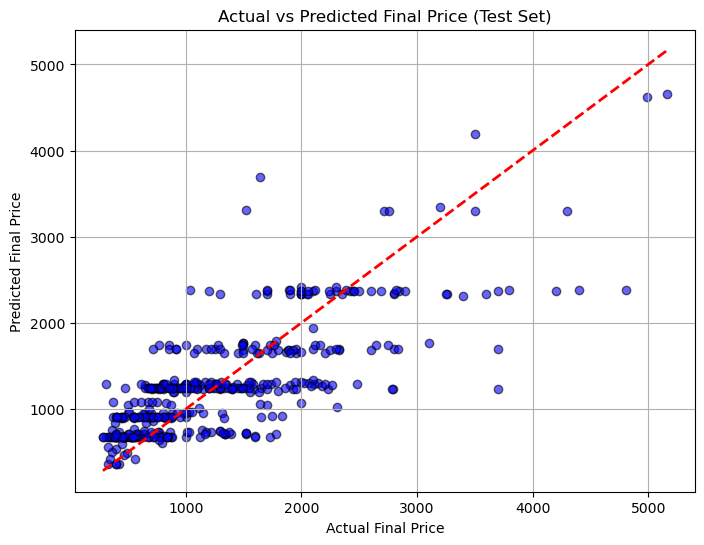

In [16]:
import matplotlib.pyplot as plt

# Plot the true values vs predicted values for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Final Price')
plt.ylabel('Predicted Final Price')
plt.title('Actual vs Predicted Final Price (Test Set)')
plt.grid(True)
plt.show()


In [17]:
# Get the coefficients (weights) from the Ridge model with r=100
ridge_model_r100 = Ridge(alpha=100)
ridge_model_r100.fit(X_train_0, y_train)

# Coefficients (weights) for the model
weights = ridge_model_r100.coef_

# Associate each coefficient with its corresponding feature (ram, storage, screen)
coefficients_df = pd.DataFrame({
    'Feature': ['ram', 'storage', 'screen'],
    'Weight (w)': weights
})

coefficients_df


,Feature,Weight (w)
0,ram,2.305659
1,storage,-0.112393
2,screen,14.852656
